In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [296]:
# load dataset 
path = 'Combined_Datalist_v1.1.csv'

house = pd.read_csv(path, sep=';')
house

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600.000.000,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2.0,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600.000.000,3,2,48,2023,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,2.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600.000.000,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600.000.000,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1.0,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600.000.000,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,tenggilis mejoyo,9.000.000.000,5,3,540,400,SHM - Sertifikat Hak Milik,NaN,NaN,Tidak,Unfurnished,1.0,NaN,Tidak,NaN,NaN,Tidak,Bagus
8976,tambaksari,9.000.000.000,4,2,630,245,SHM - Sertifikat Hak Milik,6600.0,NaN,Tidak,Unfurnished,1.0,NaN,Ya,3 Mobil,PAM atau PDAM,Ya,Butuh Renovasi
8977,wonocolo,9.000.000.000,4,4,780,500,SHM - Sertifikat Hak Milik,NaN,Tidak,Tidak,Unfurnished,1.0,NaN,Tidak,NaN,NaN,Tidak,Bagus
8978,sukomanunggal,9.000.000.000,4,2,800,250,SHM - Sertifikat Hak Milik,6600.0,NaN,Ya,Unfurnished,1.0,Timur,Ya,3 Mobil,PAM atau PDAM,Tidak,Bagus


# Data Preprocess

In [297]:
house.head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600.000.000,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2.0,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600.000.000,3,2,48,2023,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,2.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600.000.000,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600.000.000,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1.0,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600.000.000,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru


In [298]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            8980 non-null   object 
 1    Price               8980 non-null   object 
 2   Kamar Tidur          8980 non-null   int64  
 3   Kamar Mandi          8980 non-null   int64  
 4   Luas Tanah           8980 non-null   int64  
 5   Luas Bangunan        8980 non-null   int64  
 6   Sertifikat           8980 non-null   object 
 7   Daya Listrik         6815 non-null   float64
 8   Ruang Makan          6618 non-null   object 
 9   Ruang Tamu           8414 non-null   object 
 10  Kondisi Perabotan    8980 non-null   object 
 11  Jumlah Lantai        8941 non-null   float64
 12  Hadap                5851 non-null   object 
 13  Terjangkau Internet  8416 non-null   object 
 14  Lebar Jalan          4593 non-null   object 
 15  Sumber Air           5961 non-null   o

In [299]:
# melihat dimensi data
house.shape

(8980, 18)

In [300]:
house.isnull().sum()

Kecamatan                 0
 Price                    0
Kamar Tidur               0
Kamar Mandi               0
Luas Tanah                0
Luas Bangunan             0
Sertifikat                0
Daya Listrik           2165
Ruang Makan            2362
Ruang Tamu              566
Kondisi Perabotan         0
Jumlah Lantai            39
Hadap                  3129
Terjangkau Internet     564
Lebar Jalan            4387
Sumber Air             3019
Hook                    564
Kondisi Properti        380
dtype: int64

In [301]:
house['Daya Listrik'].isna().sum()

np.int64(2165)

In [302]:
house['Daya Listrik'].value_counts(ascending=True)

Daya Listrik
12700.0       1
9500.0        1
17600.0       2
13300.0       2
11000.0       4
7600.0        4
8000.0        5
13200.0      11
16500.0      18
10000.0      21
10600.0      37
900.0        45
7700.0       46
3300.0      153
6600.0      157
5500.0      353
4400.0      817
3500.0      844
1300.0      887
2200.0     3407
Name: count, dtype: int64

In [303]:
house['Daya Listrik'].describe()

count     6815.000000
mean      2981.276596
std       1749.447936
min        900.000000
25%       2200.000000
50%       2200.000000
75%       3500.000000
max      17600.000000
Name: Daya Listrik, dtype: float64

In [304]:
house.duplicated().any().sum()

np.int64(1)

In [305]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            8980 non-null   object 
 1    Price               8980 non-null   object 
 2   Kamar Tidur          8980 non-null   int64  
 3   Kamar Mandi          8980 non-null   int64  
 4   Luas Tanah           8980 non-null   int64  
 5   Luas Bangunan        8980 non-null   int64  
 6   Sertifikat           8980 non-null   object 
 7   Daya Listrik         6815 non-null   float64
 8   Ruang Makan          6618 non-null   object 
 9   Ruang Tamu           8414 non-null   object 
 10  Kondisi Perabotan    8980 non-null   object 
 11  Jumlah Lantai        8941 non-null   float64
 12  Hadap                5851 non-null   object 
 13  Terjangkau Internet  8416 non-null   object 
 14  Lebar Jalan          4593 non-null   object 
 15  Sumber Air           5961 non-null   o

In [306]:
print(house.describe(include="all"))

       Kecamatan           Price   Kamar Tidur  Kamar Mandi   Luas Tanah  \
count       8980             8980  8980.000000  8980.000000  8980.000000   
unique        27              481          NaN          NaN          NaN   
top      rungkut   2.500.000.000           NaN          NaN          NaN   
freq        1750              287          NaN          NaN          NaN   
mean         NaN              NaN     3.546214     2.674610   187.124165   
std          NaN              NaN     1.075697     1.049781   140.574192   
min          NaN              NaN     1.000000     1.000000    45.000000   
25%          NaN              NaN     3.000000     2.000000    97.000000   
50%          NaN              NaN     3.000000     3.000000   135.000000   
75%          NaN              NaN     4.000000     3.000000   230.000000   
max          NaN              NaN     7.000000     8.000000  1000.000000   

        Luas Bangunan                  Sertifikat  Daya Listrik Ruang Makan  \
count   

# menangani columns dupliacted

In [307]:
house.drop_duplicates(inplace=True)

In [308]:
house.duplicated().sum()

np.int64(0)

menangani inkonsistensi data

In [309]:
house.columns

Index(['Kecamatan', ' Price ', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah',
       'Luas Bangunan', 'Sertifikat', 'Daya Listrik', 'Ruang Makan',
       'Ruang Tamu', 'Kondisi Perabotan', 'Jumlah Lantai', 'Hadap',
       'Terjangkau Internet', 'Lebar Jalan', 'Sumber Air', 'Hook',
       'Kondisi Properti'],
      dtype='object')

In [310]:
house[' Price '].nunique

<bound method IndexOpsMixin.nunique of 0          600.000.000 
1          600.000.000 
2          600.000.000 
3          600.000.000 
4          600.000.000 
             ...       
8975     9.000.000.000 
8976     9.000.000.000 
8977     9.000.000.000 
8978     9.000.000.000 
8979     9.000.000.000 
Name:  Price , Length: 7995, dtype: object>

In [311]:
house[' Price '] = house[' Price '].str.replace('.','', regex=False)

In [312]:
house[' Price '] = house[' Price '].astype('Float64')

In [313]:
house[' Price '].info()

<class 'pandas.core.series.Series'>
Index: 7995 entries, 0 to 8979
Series name:  Price 
Non-Null Count  Dtype  
--------------  -----  
7995 non-null   Float64
dtypes: Float64(1)
memory usage: 132.7 KB


In [314]:
house.head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600000000.0,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2.0,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600000000.0,3,2,48,2023,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,2.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600000000.0,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3.0,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600000000.0,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1.0,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600000000.0,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,NaN,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru


In [315]:
house['Luas Bangunan'].describe()

count    7995.000000
mean      206.090306
std       157.163812
min        50.000000
25%       110.000000
50%       160.000000
75%       250.000000
max      3300.000000
Name: Luas Bangunan, dtype: float64

In [316]:
house["Luas Bangunan"].value_counts().sort_index()

Luas Bangunan
50      54
51       2
52      21
53       3
54      14
        ..
1406     1
1500     1
2000     1
2023     2
3300     1
Name: count, Length: 407, dtype: int64

In [317]:
house['Sumber Air'].value_counts()

Sumber Air
PAM atau PDAM    5254
Sumur Bor          18
Sumur Pompa        13
Sumur Resapan       2
Sumur Galian        1
Name: count, dtype: int64

In [318]:
house['Kondisi Properti'].value_counts()

Kondisi Properti
Bagus             4543
Baru              2281
Butuh Renovasi     446
Sudah Renovasi     208
Bagus Sekali       138
Unfurnished          2
Name: count, dtype: int64

In [319]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            7995 non-null   object 
 1    Price               7995 non-null   Float64
 2   Kamar Tidur          7995 non-null   int64  
 3   Kamar Mandi          7995 non-null   int64  
 4   Luas Tanah           7995 non-null   int64  
 5   Luas Bangunan        7995 non-null   int64  
 6   Sertifikat           7995 non-null   object 
 7   Daya Listrik         6090 non-null   float64
 8   Ruang Makan          5760 non-null   object 
 9   Ruang Tamu           7446 non-null   object 
 10  Kondisi Perabotan    7995 non-null   object 
 11  Jumlah Lantai        7956 non-null   float64
 12  Hadap                5164 non-null   object 
 13  Terjangkau Internet  7448 non-null   object 
 14  Lebar Jalan          4114 non-null   object 
 15  Sumber Air           5288 non-null   object

In [320]:
house['Jumlah Lantai'].value_counts()

Jumlah Lantai
2.0    4472
1.0    3264
3.0     212
4.0       8
Name: count, dtype: int64

In [321]:
house['Jumlah Lantai'].nunique

<bound method IndexOpsMixin.nunique of 0       2.0
1       2.0
2       3.0
3       1.0
4       NaN
       ... 
8975    1.0
8976    1.0
8977    1.0
8978    1.0
8979    2.0
Name: Jumlah Lantai, Length: 7995, dtype: float64>

In [322]:
house['Jumlah Lantai'] = house['Jumlah Lantai'].astype('Int64')

In [323]:
house['Jumlah Lantai'].info()

<class 'pandas.core.series.Series'>
Index: 7995 entries, 0 to 8979
Series name: Jumlah Lantai
Non-Null Count  Dtype
--------------  -----
7956 non-null   Int64
dtypes: Int64(1)
memory usage: 132.7 KB


insight: 

- menghapus columns duplicated
- menangani tipe data Price yang awalnya string menjadi float
- menangani Jumlah Lantai yang awalnya float menjadi int

# Menangani Missing Values

In [324]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            7995 non-null   object 
 1    Price               7995 non-null   Float64
 2   Kamar Tidur          7995 non-null   int64  
 3   Kamar Mandi          7995 non-null   int64  
 4   Luas Tanah           7995 non-null   int64  
 5   Luas Bangunan        7995 non-null   int64  
 6   Sertifikat           7995 non-null   object 
 7   Daya Listrik         6090 non-null   float64
 8   Ruang Makan          5760 non-null   object 
 9   Ruang Tamu           7446 non-null   object 
 10  Kondisi Perabotan    7995 non-null   object 
 11  Jumlah Lantai        7956 non-null   Int64  
 12  Hadap                5164 non-null   object 
 13  Terjangkau Internet  7448 non-null   object 
 14  Lebar Jalan          4114 non-null   object 
 15  Sumber Air           5288 non-null   object

In [325]:
Missing_value = house.isna().sum()
Missing_value[Missing_value > 0]

Daya Listrik           1905
Ruang Makan            2235
Ruang Tamu              549
Jumlah Lantai            39
Hadap                  2831
Terjangkau Internet     547
Lebar Jalan            3881
Sumber Air             2707
Hook                    547
Kondisi Properti        377
dtype: int64

In [326]:
print(house.isnull().mean()*100)

Kecamatan               0.000000
 Price                  0.000000
Kamar Tidur             0.000000
Kamar Mandi             0.000000
Luas Tanah              0.000000
Luas Bangunan           0.000000
Sertifikat              0.000000
Daya Listrik           23.827392
Ruang Makan            27.954972
Ruang Tamu              6.866792
Kondisi Perabotan       0.000000
Jumlah Lantai           0.487805
Hadap                  35.409631
Terjangkau Internet     6.841776
Lebar Jalan            48.542839
Sumber Air             33.858662
Hook                    6.841776
Kondisi Properti        4.715447
dtype: float64


In [327]:
house_missing_values = house.isna().sum()

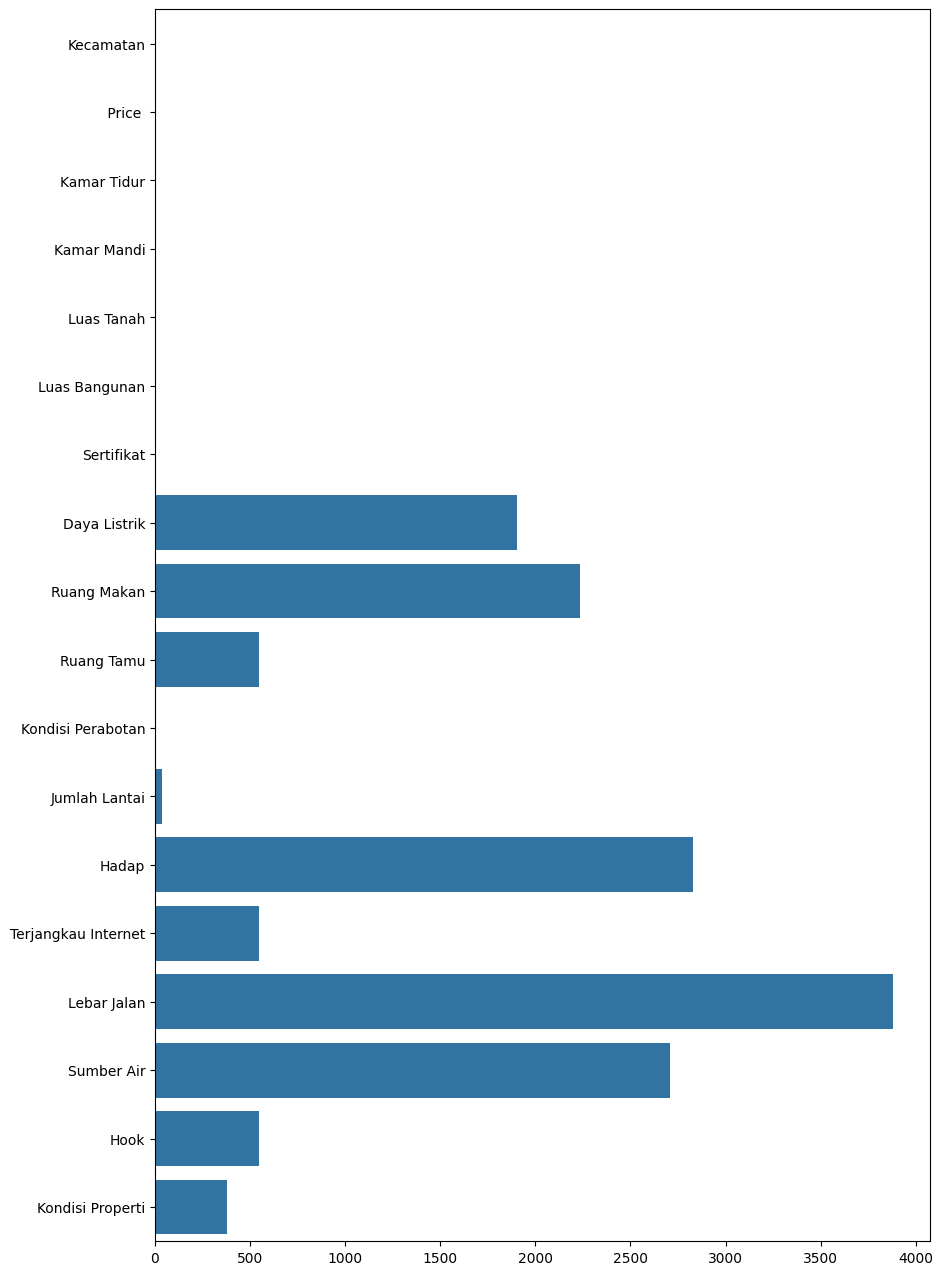

In [328]:
# buat figure
fig, ax = plt.subplots(figsize = (10, 16))

# buat barplot presentase NaN tiap kolom 
sns.barplot(data = house_missing_values, 
            orient="h", 
            ax = ax)

# menampilkan visualisasi
plt.show()

In [329]:
missing_5 = house_missing_values[house_missing_values < 0.5].index
missing_5

Index(['Kecamatan', ' Price ', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah',
       'Luas Bangunan', 'Sertifikat', 'Kondisi Perabotan'],
      dtype='object')

In [330]:
house.loc[:, ['Kecamatan', ' Price ', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 
      'Luas Bangunan', 'Sertifikat', 'Kondisi Perabotan']].head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Kondisi Perabotan
0,wonokromo,600000000.0,3,2,45,70,SHM - Sertifikat Hak Milik,Unfurnished
1,rungkut,600000000.0,3,2,48,2023,SHM - Sertifikat Hak Milik,Unfurnished
2,semampir,600000000.0,3,3,48,85,SHM - Sertifikat Hak Milik,Unfurnished
3,pakal,600000000.0,2,1,50,91,HGB - Hak Guna Bangunan,Unfurnished
4,gayungan,600000000.0,2,2,51,50,SHM - Sertifikat Hak Milik,Unfurnished


In [331]:
missing_5.dropna()

Index(['Kecamatan', ' Price ', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah',
       'Luas Bangunan', 'Sertifikat', 'Kondisi Perabotan'],
      dtype='object')

In [332]:
house.shape

(7995, 18)

In [333]:
house.isna().sum()

Kecamatan                 0
 Price                    0
Kamar Tidur               0
Kamar Mandi               0
Luas Tanah                0
Luas Bangunan             0
Sertifikat                0
Daya Listrik           1905
Ruang Makan            2235
Ruang Tamu              549
Kondisi Perabotan         0
Jumlah Lantai            39
Hadap                  2831
Terjangkau Internet     547
Lebar Jalan            3881
Sumber Air             2707
Hook                    547
Kondisi Properti        377
dtype: int64

In [334]:
print(house.isnull().mean()*100)

Kecamatan               0.000000
 Price                  0.000000
Kamar Tidur             0.000000
Kamar Mandi             0.000000
Luas Tanah              0.000000
Luas Bangunan           0.000000
Sertifikat              0.000000
Daya Listrik           23.827392
Ruang Makan            27.954972
Ruang Tamu              6.866792
Kondisi Perabotan       0.000000
Jumlah Lantai           0.487805
Hadap                  35.409631
Terjangkau Internet     6.841776
Lebar Jalan            48.542839
Sumber Air             33.858662
Hook                    6.841776
Kondisi Properti        4.715447
dtype: float64


In [335]:
house.dropna(subset=['Kondisi Properti'])

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
0,wonokromo,600000000.0,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2,Barat,Tidak,NaN,NaN,Tidak,Baru
1,rungkut,600000000.0,3,2,48,2023,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,2,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Baru
2,semampir,600000000.0,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
3,pakal,600000000.0,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1,Barat,Ya,2 Mobil,Sumur Pompa,Ya,Baru
4,gayungan,600000000.0,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,<NA>,NaN,Tidak,NaN,PAM atau PDAM,Tidak,Baru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,tenggilis mejoyo,9000000000.0,5,3,540,400,SHM - Sertifikat Hak Milik,NaN,NaN,Tidak,Unfurnished,1,NaN,Tidak,NaN,NaN,Tidak,Bagus
8976,tambaksari,9000000000.0,4,2,630,245,SHM - Sertifikat Hak Milik,6600.0,NaN,Tidak,Unfurnished,1,NaN,Ya,3 Mobil,PAM atau PDAM,Ya,Butuh Renovasi
8977,wonocolo,9000000000.0,4,4,780,500,SHM - Sertifikat Hak Milik,NaN,Tidak,Tidak,Unfurnished,1,NaN,Tidak,NaN,NaN,Tidak,Bagus
8978,sukomanunggal,9000000000.0,4,2,800,250,SHM - Sertifikat Hak Milik,6600.0,NaN,Ya,Unfurnished,1,Timur,Ya,3 Mobil,PAM atau PDAM,Tidak,Bagus


In [336]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 0 to 8979
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kecamatan            7995 non-null   object 
 1    Price               7995 non-null   Float64
 2   Kamar Tidur          7995 non-null   int64  
 3   Kamar Mandi          7995 non-null   int64  
 4   Luas Tanah           7995 non-null   int64  
 5   Luas Bangunan        7995 non-null   int64  
 6   Sertifikat           7995 non-null   object 
 7   Daya Listrik         6090 non-null   float64
 8   Ruang Makan          5760 non-null   object 
 9   Ruang Tamu           7446 non-null   object 
 10  Kondisi Perabotan    7995 non-null   object 
 11  Jumlah Lantai        7956 non-null   Int64  
 12  Hadap                5164 non-null   object 
 13  Terjangkau Internet  7448 non-null   object 
 14  Lebar Jalan          4114 non-null   object 
 15  Sumber Air           5288 non-null   object

In [337]:
house.describe(include='all')

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti
count,7995,7995.0,7995.000000,7995.000000,7995.000000,7995.000000,7995,6090.000000,5760,7446,7995,7956.0,5164,7448,4114,5288,7448,7618
unique,27,<NA>,NaN,NaN,NaN,NaN,4,NaN,2,2,2,<NA>,8,2,4,5,2,6
top,rungkut,<NA>,NaN,NaN,NaN,NaN,SHM - Sertifikat Hak Milik,NaN,Tidak,Tidak,Unfurnished,<NA>,Selatan,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus
freq,1468,<NA>,NaN,NaN,NaN,NaN,6345,NaN,3083,3965,7994,<NA>,1884,3843,2178,5254,6960,4543
mean,NaN,3434704940.587867,3.550719,2.669418,189.353471,206.090306,NaN,3006.929392,NaN,NaN,NaN,1.618401,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4131263442.107079,1.093810,1.056526,141.780035,157.163812,NaN,1773.963053,NaN,NaN,NaN,0.543456,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,600000000.0,1.000000,1.000000,45.000000,50.000000,NaN,900.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1500000000.0,3.000000,2.000000,98.000000,110.000000,NaN,2200.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2190000000.0,3.000000,3.000000,137.000000,160.000000,NaN,2200.000000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3700000000.0,4.000000,3.000000,234.000000,250.000000,NaN,3500.000000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


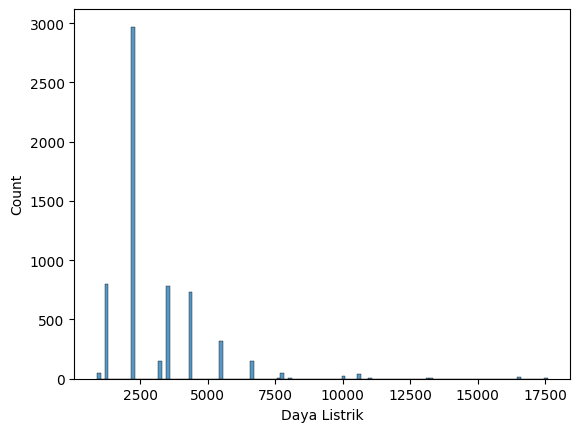

In [338]:
sns.histplot(data = house, x="Daya Listrik")
plt.show()

mengisi columns daya lsitrik dengan mean

In [339]:
house['Daya Listrik'].fillna(house['Daya Listrik'].mean(), inplace=True)

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22520\2837012927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Daya Listrik'].fillna(house['Daya Listrik'].mean(), inplace=True)


mengisi ruang makan, hadap, sumber air dengan modus

In [340]:
house['Ruang Makan'].fillna(house['Ruang Makan'].mode()[0], inplace=True)

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22520\2349941292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Ruang Makan'].fillna(house['Ruang Makan'].mode()[0], inplace=True)


In [341]:
house['Hadap'].fillna(house['Hadap'].mode()[0], inplace=True)

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22520\1201749134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Hadap'].fillna(house['Hadap'].mode()[0], inplace=True)


In [342]:
house['Sumber Air'].fillna(house['Sumber Air'].mode()[0], inplace=True)

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22520\752952561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Sumber Air'].fillna(house['Sumber Air'].mode()[0], inplace=True)


In [343]:
house['Ruang Tamu'].fillna(house['Ruang Tamu'].mode()[0], inplace=True)

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_22520\2626917404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Ruang Tamu'].fillna(house['Ruang Tamu'].mode()[0], inplace=True)


sisanya aku ingin drop kolom yang tidak dibutuhkan

In [344]:
house = house.drop(columns=['Terjangkau Internet', 'Lebar Jalan', 'Hook', 'Kondisi Properti'])

In [345]:
house.describe(include='object')

,Kecamatan,Sertifikat,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Hadap,Sumber Air
count,7995,7995,7995,7995,7995,7995,7995
unique,27,4,2,2,2,8,5
top,rungkut,SHM - Sertifikat Hak Milik,Tidak,Tidak,Unfurnished,Selatan,PAM atau PDAM
freq,1468,6345,5318,4514,7994,4715,7961


In [346]:
house['Luas Tanah'].value_counts(ascending=True)

Luas Tanah
465      1
596      1
882      1
49       1
528      1
      ... 
180    211
100    287
200    345
90     355
120    388
Name: count, Length: 502, dtype: int64

In [347]:
house['Luas Tanah'].max()

np.int64(1000)

In [348]:
house.isnull().sum()

Kecamatan             0
 Price                0
Kamar Tidur           0
Kamar Mandi           0
Luas Tanah            0
Luas Bangunan         0
Sertifikat            0
Daya Listrik          0
Ruang Makan           0
Ruang Tamu            0
Kondisi Perabotan     0
Jumlah Lantai        39
Hadap                 0
Sumber Air            0
dtype: int64

In [349]:
house.shape

(7995, 14)

# Cek Outlier

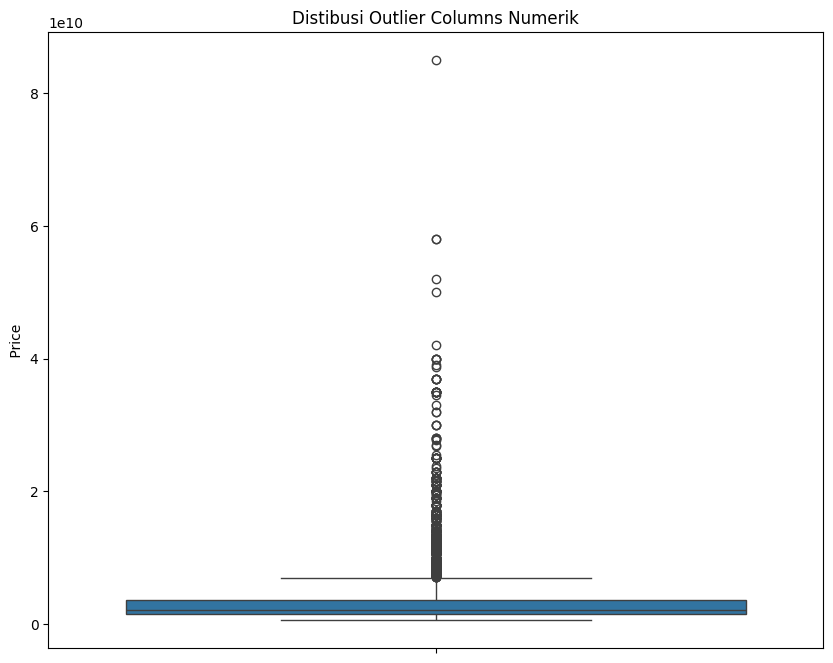

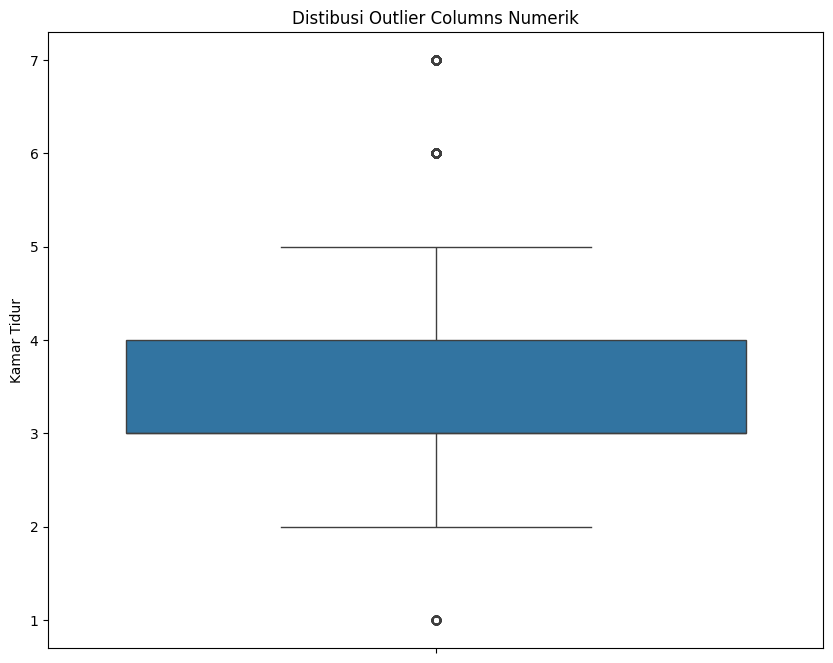

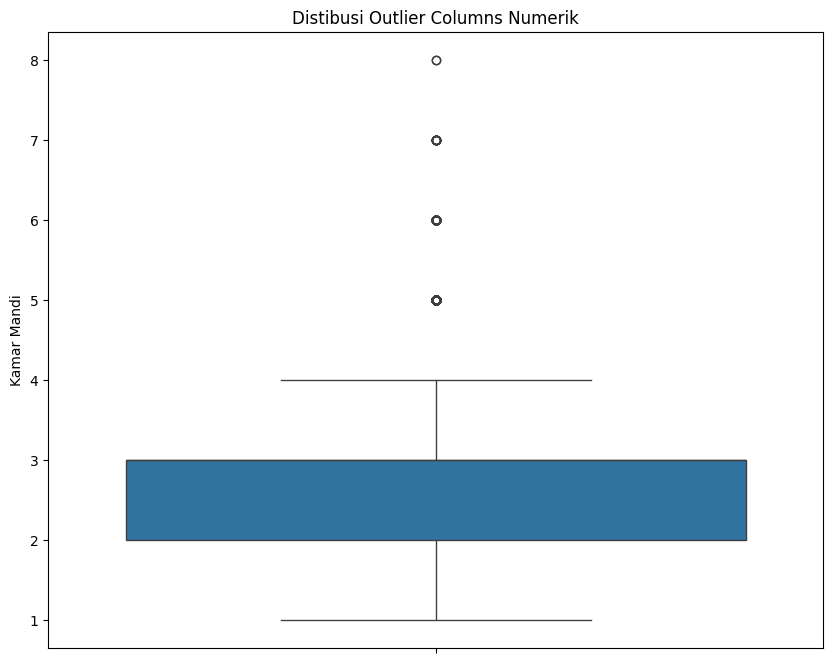

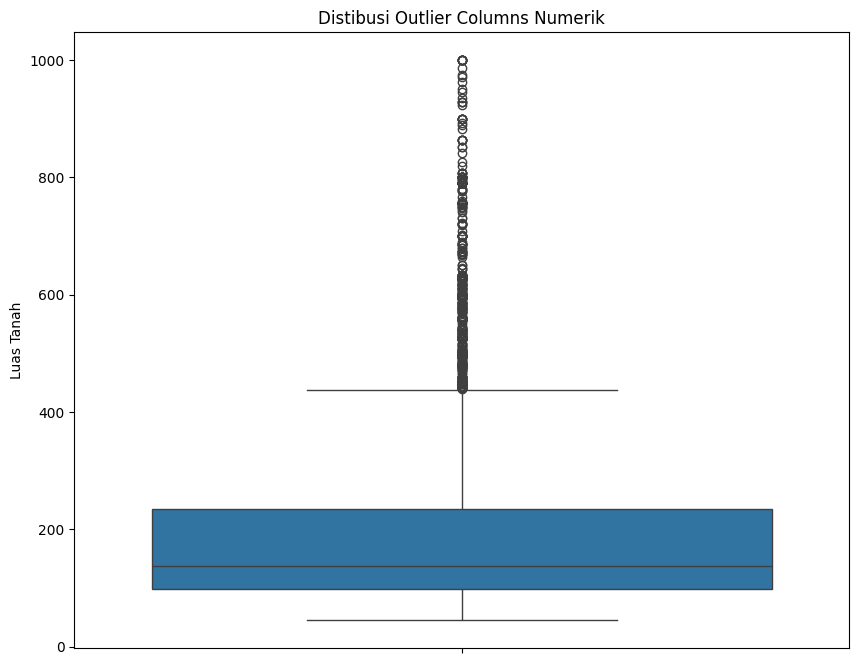

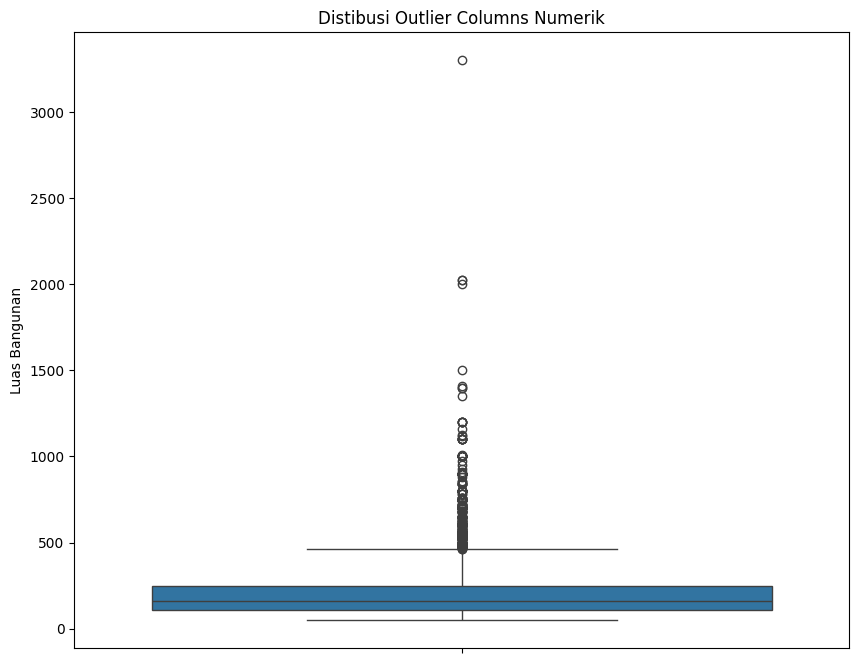

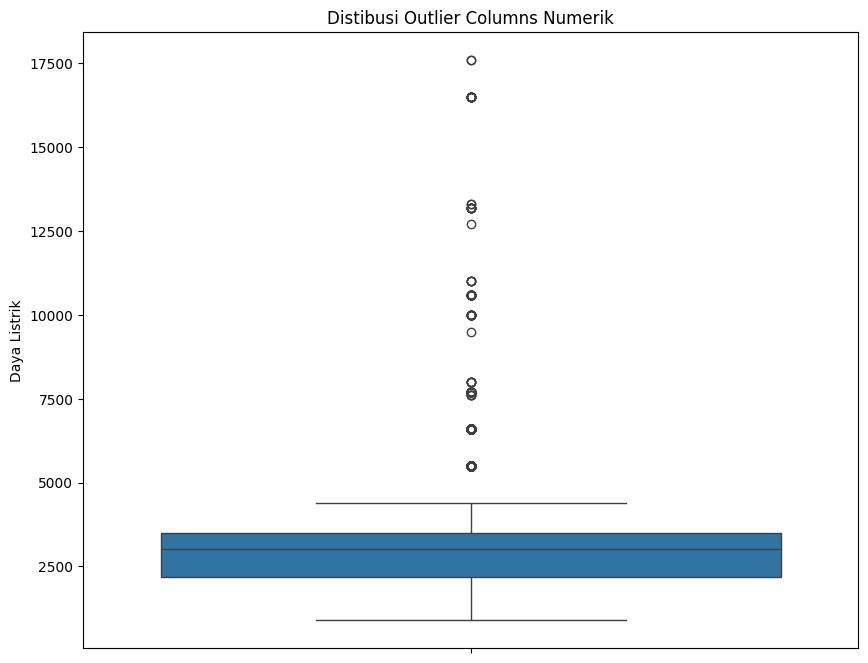

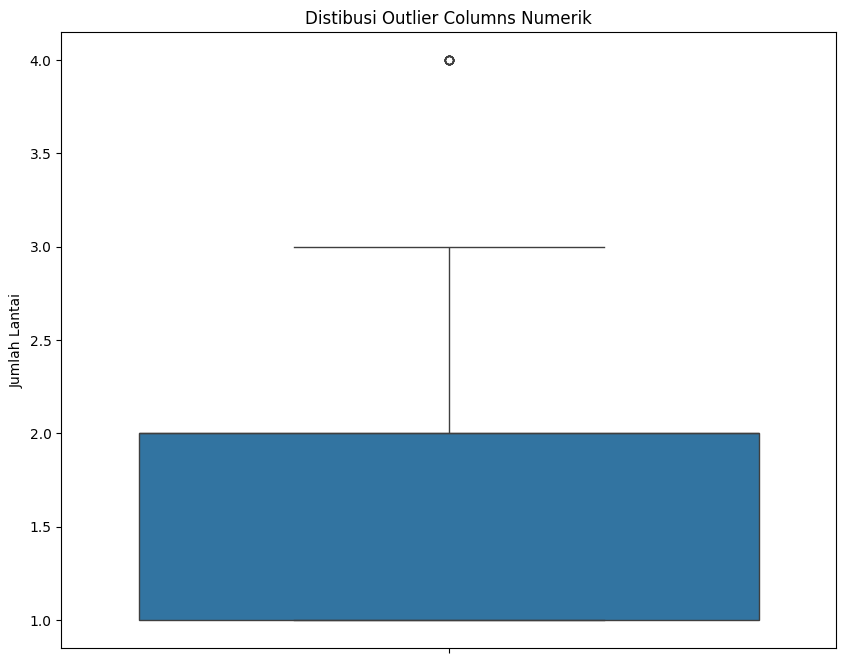

In [350]:
numerical_columns = house.select_dtypes(include=['number']).columns

for feature in numerical_columns:
 plt.figure(figsize=(10, 8))
 sns.boxplot(y= house[feature])
 plt.title("Distibusi Outlier Columns Numerik")
 plt.show()

In [351]:
house.describe()

,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik,Jumlah Lantai
count,7995.0,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7956.0
mean,3434704940.587867,3.550719,2.669418,189.353471,206.090306,3006.929392,1.618401
std,4131263442.107079,1.093810,1.056526,141.780035,157.163812,1548.230025,0.543456
min,600000000.0,1.000000,1.000000,45.000000,50.000000,900.000000,1.0
25%,1500000000.0,3.000000,2.000000,98.000000,110.000000,2200.000000,1.0
50%,2190000000.0,3.000000,3.000000,137.000000,160.000000,3006.929392,2.0
75%,3700000000.0,4.000000,3.000000,234.000000,250.000000,3500.000000,2.0
max,85000000000.0,7.000000,8.000000,1000.000000,3300.000000,17600.000000,4.0


In [352]:
# cari Q1 dan Q3 
Q1 = house[numerical_columns].quantile(0.25)
Q3 = house[numerical_columns].quantile(0.75)

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")

Q1 :  Price           1500000000.0
Kamar Tidur               3.0
Kamar Mandi               2.0
Luas Tanah               98.0
Luas Bangunan           110.0
Daya Listrik           2200.0
Jumlah Lantai             1.0
Name: 0.25, dtype: Float64
Q3 :  Price           3700000000.0
Kamar Tidur               4.0
Kamar Mandi               3.0
Luas Tanah              234.0
Luas Bangunan           250.0
Daya Listrik           3500.0
Jumlah Lantai             2.0
Name: 0.75, dtype: Float64


In [353]:
# Cari IQR dan BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR
min_bound = Q1 - 1.5*IQR

min_bound_cleaned = min_bound.clip(lower=0)

# Sekarang cetak hasilnya
print(f"IQR:\n{IQR.round(2)}\n")
print(f"Maximum Boundary:\n{max_bound.round(2)}\n")
print(f"Minimum Boundary (Setelah dibersihkan):\n{min_bound_cleaned.round(2)}")

IQR:
 Price           2200000000.0
Kamar Tidur               1.0
Kamar Mandi               1.0
Luas Tanah              136.0
Luas Bangunan           140.0
Daya Listrik           1300.0
Jumlah Lantai             1.0
dtype: Float64

Maximum Boundary:
 Price           7000000000.0
Kamar Tidur               5.5
Kamar Mandi               4.5
Luas Tanah              438.0
Luas Bangunan           460.0
Daya Listrik           5450.0
Jumlah Lantai             3.5
dtype: Float64

Minimum Boundary (Setelah dibersihkan):
 Price             0.0
Kamar Tidur        1.5
Kamar Mandi        0.5
Luas Tanah         0.0
Luas Bangunan      0.0
Daya Listrik     250.0
Jumlah Lantai      0.0
dtype: Float64


In [354]:
outlier_clean = (house[numerical_columns] >= min_bound_cleaned) & (house[numerical_columns] <= max_bound)

In [355]:
no_outlier_row = outlier_clean.all(axis=1)

In [356]:
house = house[no_outlier_row]

In [357]:
house.describe()

,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik,Jumlah Lantai
count,6294.0,6294.000000,6294.000000,6294.000000,6294.000000,6294.000000,6263.0
mean,2215097235.462345,3.292660,2.450747,142.711471,157.013982,2629.241282,1.611688
std,1224556101.368314,0.819952,0.858884,72.033164,75.765396,832.901829,0.530095
min,600000000.0,2.000000,1.000000,45.000000,50.000000,900.000000,1.0
25%,1350000000.0,3.000000,2.000000,90.000000,100.000000,2200.000000,1.0
50%,1850000000.0,3.000000,2.000000,120.000000,140.000000,2200.000000,2.0
75%,2800000000.0,4.000000,3.000000,180.000000,200.000000,3006.929392,2.0
max,7000000000.0,5.000000,4.000000,430.000000,460.000000,4400.000000,3.0


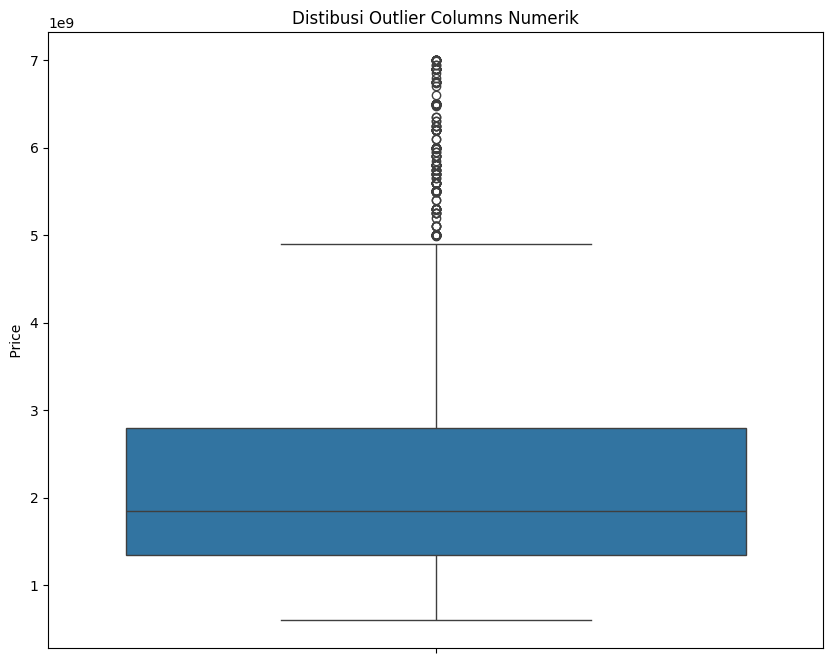

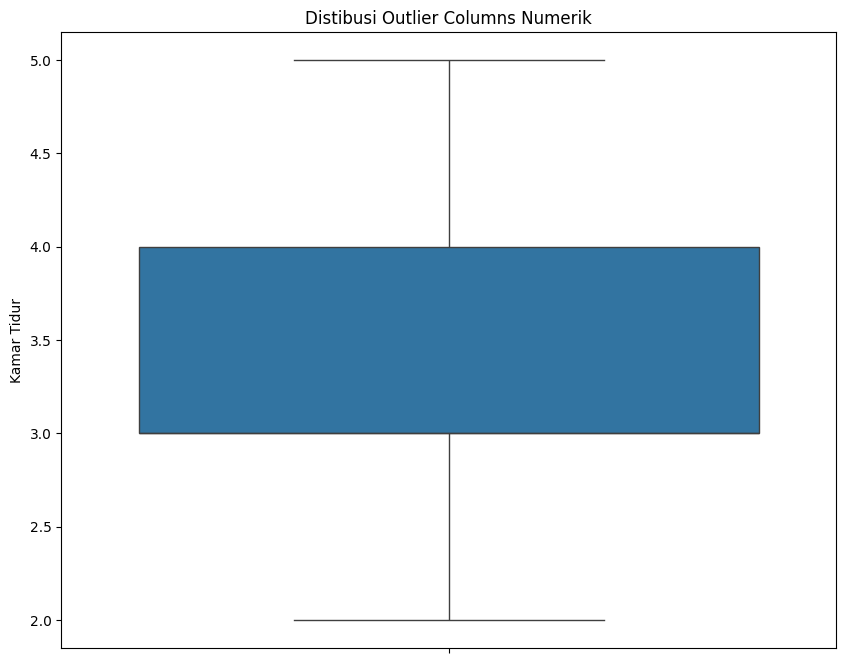

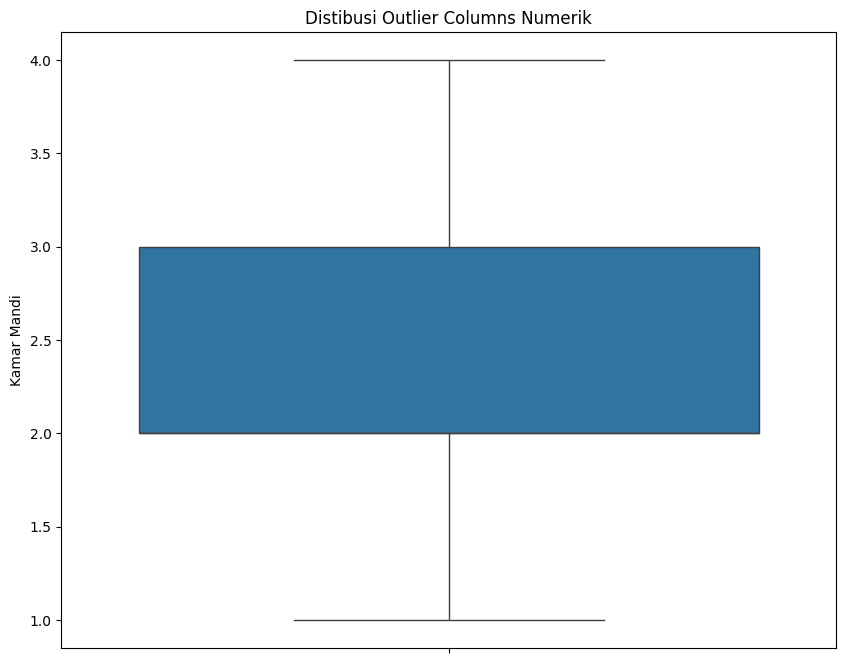

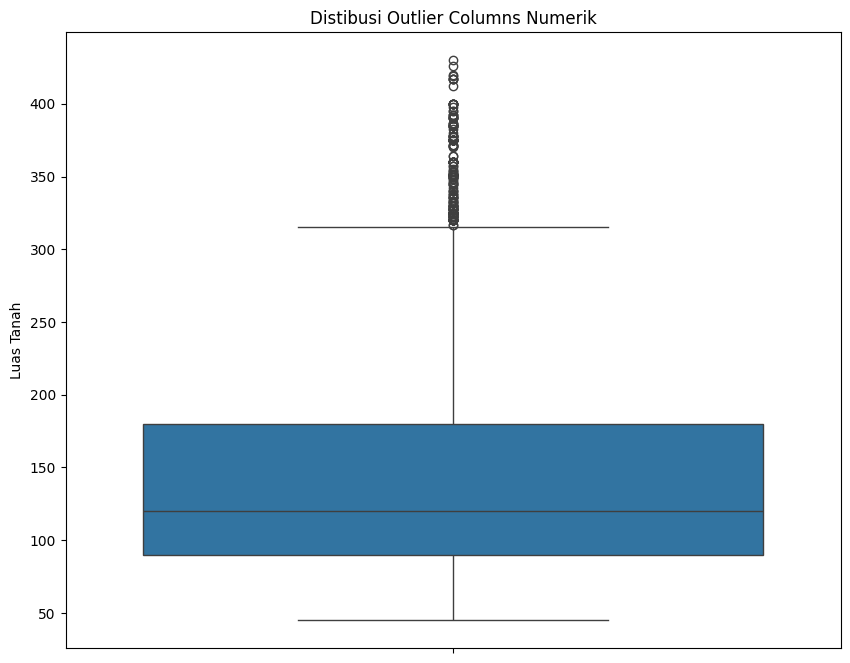

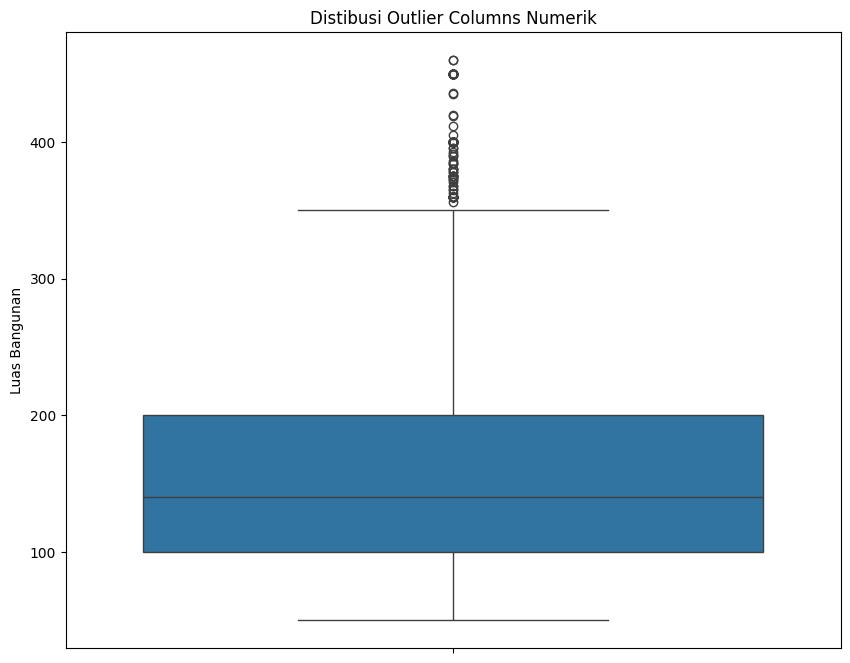

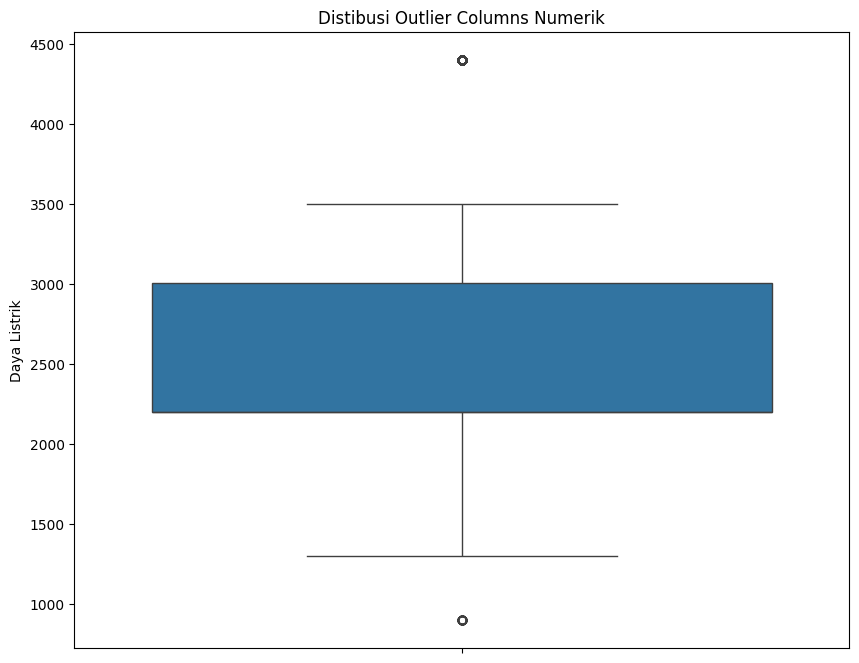

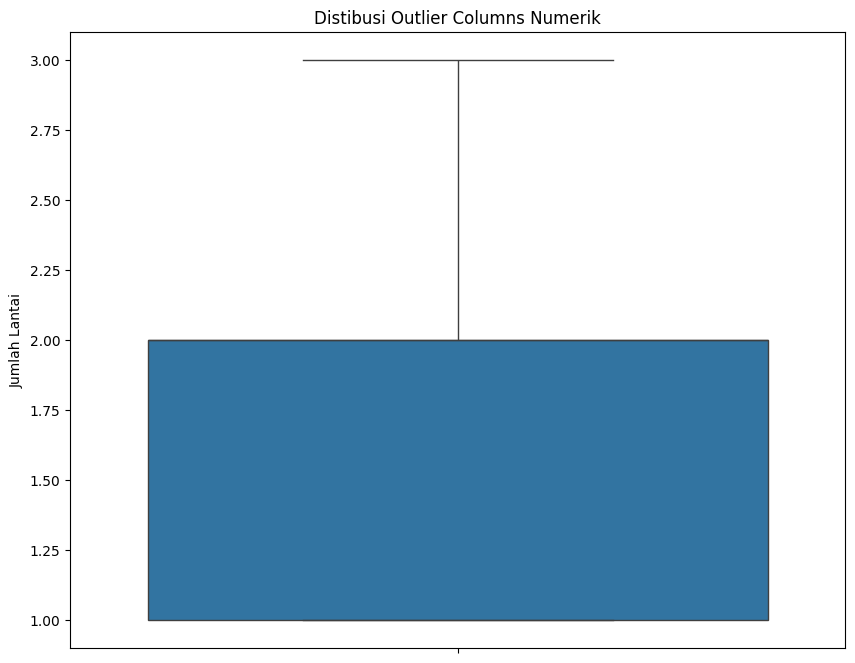

In [358]:
numerical_columns = house.select_dtypes(include=['number']).columns

for feature in numerical_columns:
 plt.figure(figsize=(10, 8))
 sns.boxplot(y= house[feature])
 plt.title("Distibusi Outlier Columns Numerik")
 plt.show()

# Analisis

1. Bagaimana distribusi harga, terhadap kecamatan adakah daerah yang memiliki harga paling tinggi?

In [359]:
house.columns

Index(['Kecamatan', ' Price ', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah',
       'Luas Bangunan', 'Sertifikat', 'Daya Listrik', 'Ruang Makan',
       'Ruang Tamu', 'Kondisi Perabotan', 'Jumlah Lantai', 'Hadap',
       'Sumber Air'],
      dtype='object')

In [360]:
house.head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Sumber Air
0,wonokromo,600000000.0,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2,Barat,PAM atau PDAM
2,semampir,600000000.0,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3,Selatan,PAM atau PDAM
3,pakal,600000000.0,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1,Barat,Sumur Pompa
4,gayungan,600000000.0,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,<NA>,Selatan,PAM atau PDAM
5,rungkut,600000000.0,2,1,60,60,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,1,Selatan,PAM atau PDAM


In [367]:
Price_distribution = house.groupby('Kecamatan')[' Price '].agg(['mean', 'median', 'std', 'count'])
Price_distribution

,mean,median,std,count
Kecamatan,,,,
asemrowo,1055714285.714286,805000000.0,525519017.82451,7
benowo,1318521276.595745,1000000000.0,815294098.644394,94
bubutan,2892368421.052631,1850000000.0,1906162789.204366,19
dukuh pakis,3486137566.137566,3400000000.0,1636395039.608636,189
gayungan,3060794871.794872,3000000000.0,1251331928.930382,156
genteng,3337142857.142857,3160000000.0,1935718624.54402,14
gubeng,2636952702.702703,2300000000.0,1390593170.231569,148
jambangan,2115649122.807018,2000000000.0,921925246.644761,57
kenjeran,1886372759.856631,1600000000.0,949408849.07849,279


In [ ]:
harga_median_per_kecamatan = house.groupby('Kecamatan')[' Price '].median().sort_values(ascending=False)

print("5 Daerah Termahal Berdasarkan Harga Median (Harga Tipikal):")
print(harga_median_per_kecamatan.head())

5 Daerah Termahal Berdasarkan Harga Median (Harga Tipikal):
Kecamatan
dukuh pakis    3400000000.0
genteng        3160000000.0
gayungan       3000000000.0
wonokromo      2570000000.0
sukolilo       2500000000.0
Name:  Price , dtype: Float64


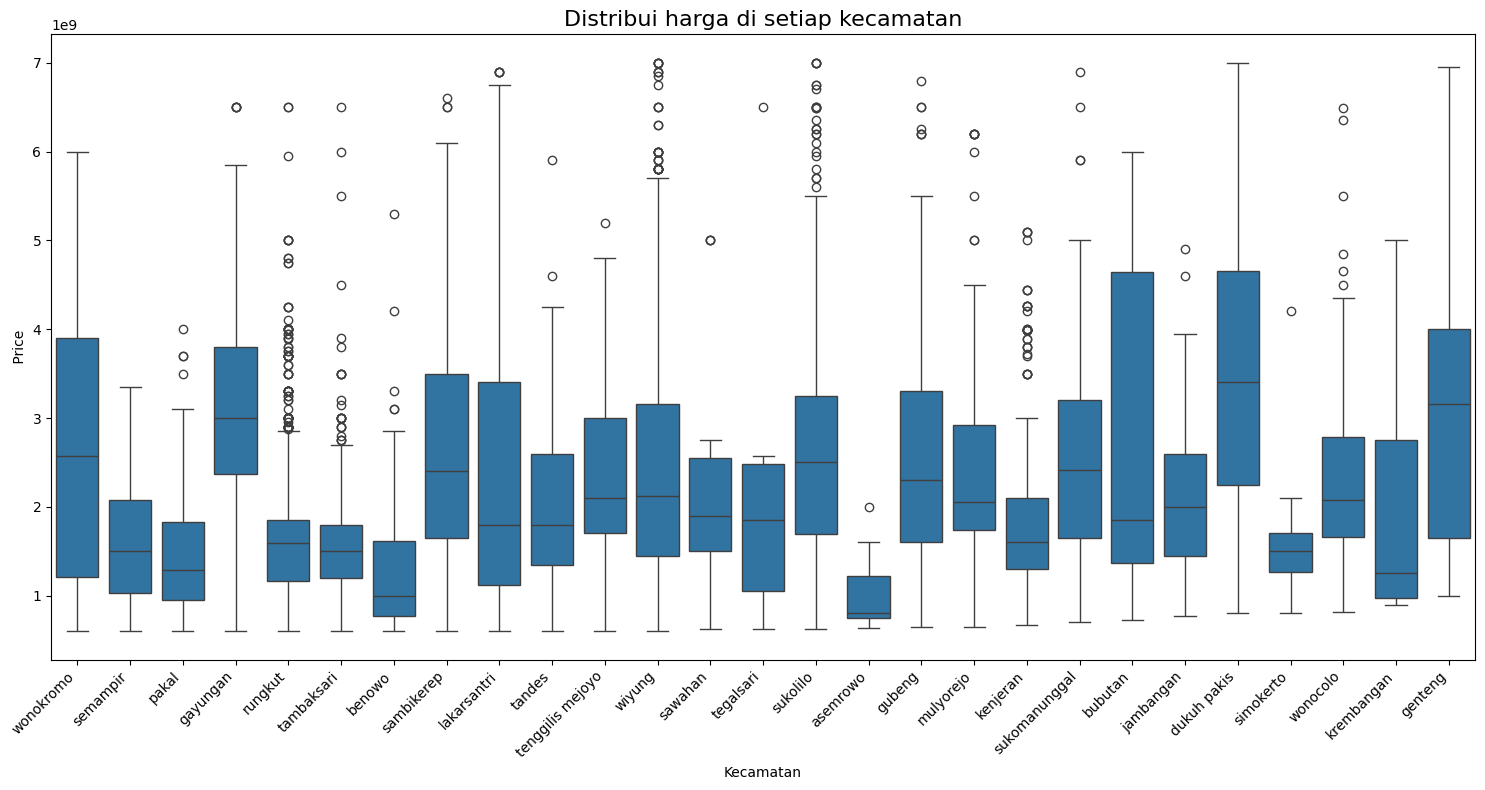

In [373]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=house, x='Kecamatan', y=' Price ')
plt.title("Distribui harga di setiap kecamatan", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

insight:

Top 5 daerah dengann harga termahal 

- dukuh pakis    
- genteng       
- gayungan       
- wonokromo      
- sukolilo       


In [378]:
house.head()

,Kecamatan,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Ruang Makan,Ruang Tamu,Kondisi Perabotan,Jumlah Lantai,Hadap,Sumber Air
0,wonokromo,600000000.0,3,2,45,70,SHM - Sertifikat Hak Milik,1300.0,Tidak,Tidak,Unfurnished,2,Barat,PAM atau PDAM
2,semampir,600000000.0,3,3,48,85,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,3,Selatan,PAM atau PDAM
3,pakal,600000000.0,2,1,50,91,HGB - Hak Guna Bangunan,1300.0,Ya,Ya,Unfurnished,1,Barat,Sumur Pompa
4,gayungan,600000000.0,2,2,51,50,SHM - Sertifikat Hak Milik,2200.0,Tidak,Tidak,Unfurnished,<NA>,Selatan,PAM atau PDAM
5,rungkut,600000000.0,2,1,60,60,SHM - Sertifikat Hak Milik,1300.0,Ya,Ya,Unfurnished,1,Selatan,PAM atau PDAM


Analisis Persebaran data Antar kolom, Price, Luas Tanah, Luas Bangunan

In [397]:
persebaran_price = house[[' Price ', 'Luas Tanah', 'Luas Bangunan']].value_counts(ascending=False).reset_index()
persebaran_price

,Price,Luas Tanah,Luas Bangunan,count
0,2500000000.0,120,170,30
1,1700000000.0,100,140,28
2,1800000000.0,82,120,27
3,1850000000.0,90,130,26
4,1300000000.0,65,110,24
...,...,...,...,...
4155,6500000000.0,375,380,1
4156,7000000000.0,400,373,1
4157,7000000000.0,357,337,1
4158,7000000000.0,325,400,1


array([[<Axes: title={'center': ' Price '}>,
        <Axes: title={'center': 'Kamar Tidur'}>,
        <Axes: title={'center': 'Kamar Mandi'}>],
       [<Axes: title={'center': 'Luas Tanah'}>,
        <Axes: title={'center': 'Luas Bangunan'}>,
        <Axes: title={'center': 'Daya Listrik'}>],
       [<Axes: title={'center': 'Jumlah Lantai'}>, <Axes: >, <Axes: >]],
      dtype=object)

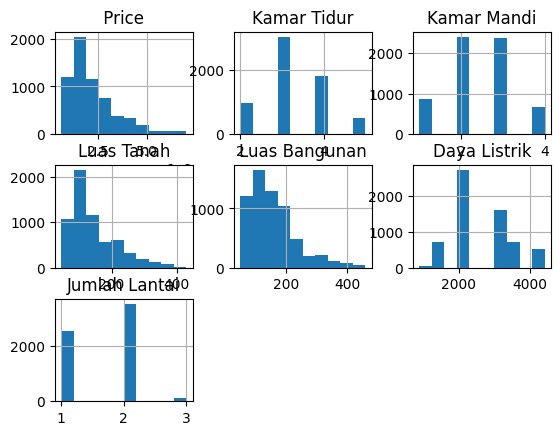

In [402]:
house.hist()

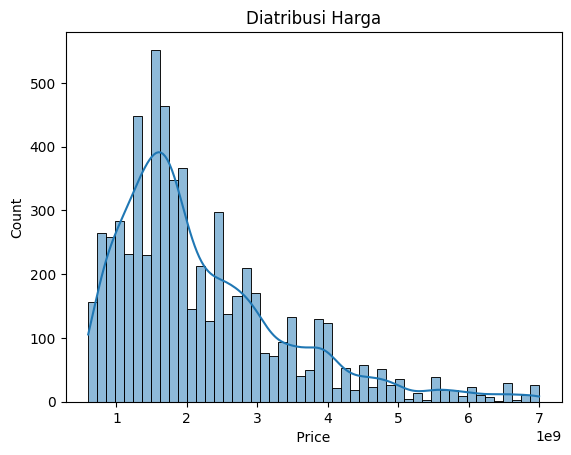

In [412]:
sns.histplot(data =house, x=' Price ', bins = 50, kde=True)
plt.title('Diatribusi Harga')
plt.show()

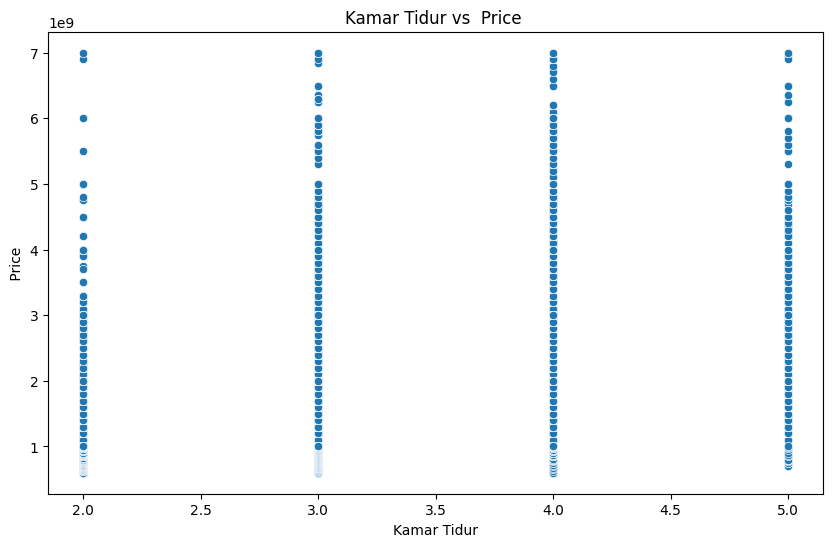

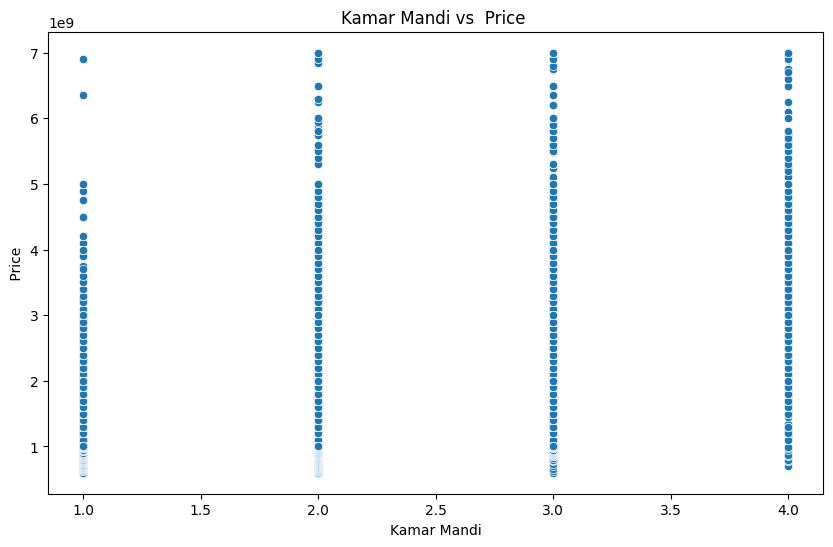

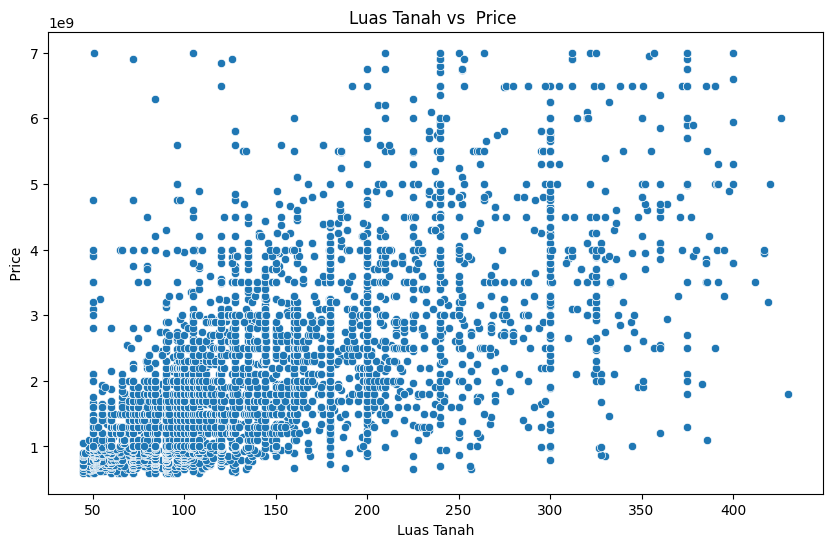

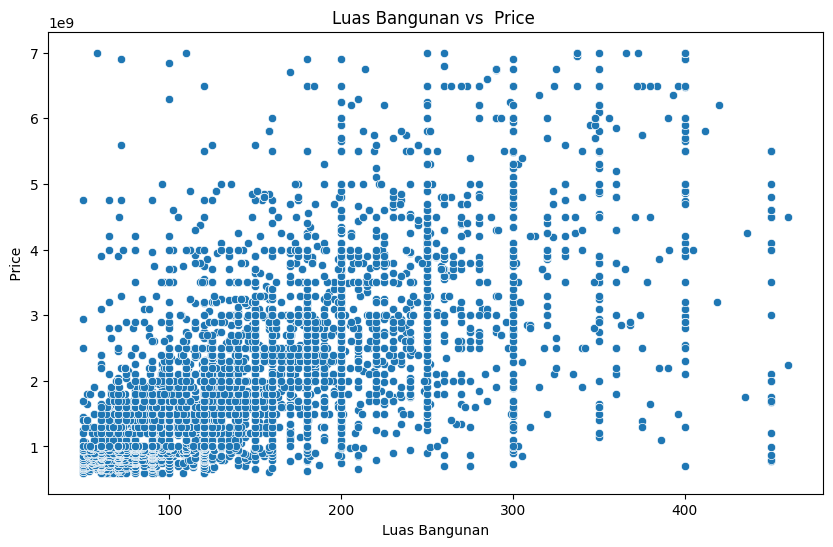

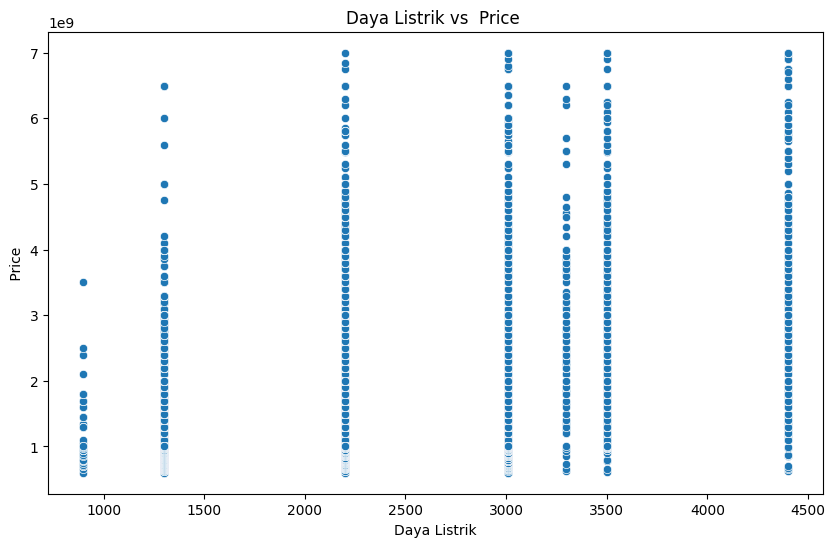

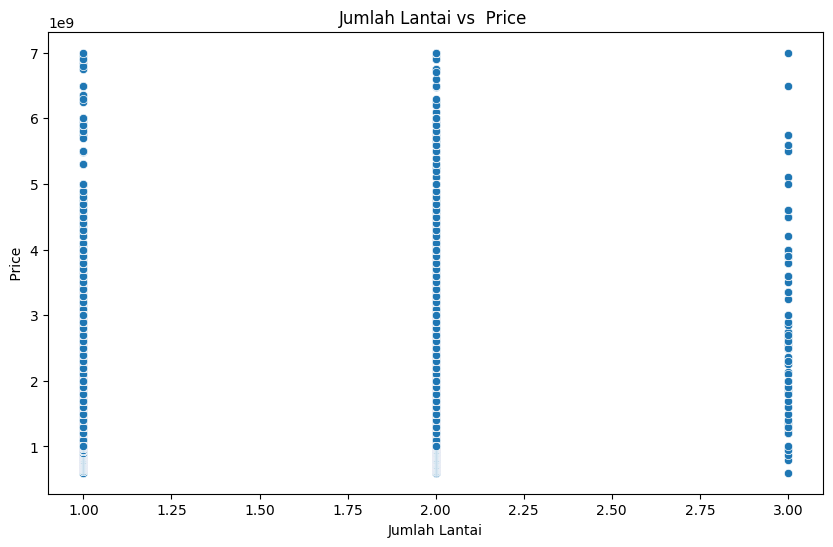

In [418]:
# menentukan Target
target_variabel = ' Price '

for feature in numerical_columns:
 # agar tidak memplot target
 if feature != target_variabel:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x = house[feature], y=house[target_variabel])
  plt.title(f"{feature} vs {target_variabel}")
  plt.show()

In [426]:
house[numerical_columns].corr()

,Price,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik,Jumlah Lantai
Price,1.000000,0.375345,0.396539,0.641278,0.668518,0.390392,0.117810
Kamar Tidur,0.375345,1.000000,0.551632,0.349391,0.538261,0.208887,0.177816
Kamar Mandi,0.396539,0.551632,1.000000,0.175305,0.455827,0.276868,0.384919
Luas Tanah,0.641278,0.349391,0.175305,1.000000,0.720360,0.307501,-0.198387
Luas Bangunan,0.668518,0.538261,0.455827,0.720360,1.000000,0.386679,0.137836
Daya Listrik,0.390392,0.208887,0.276868,0.307501,0.386679,1.000000,0.116682
Jumlah Lantai,0.117810,0.177816,0.384919,-0.198387,0.137836,0.116682,1.000000


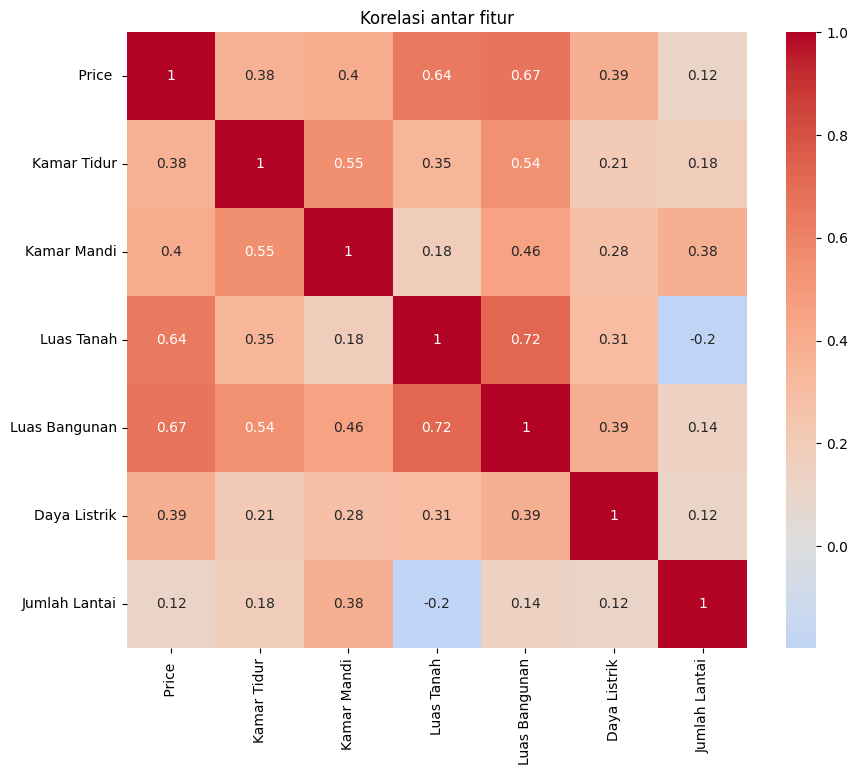

In [425]:
plt.figure(figsize=(10, 8))
sns.heatmap(house[numerical_columns].corr(), annot=True, cmap='coolwarm',center=0)
plt.title('Korelasi antar fitur')
plt.show()

In [431]:
house['Daya Listrik'].value_counts(ascending=False)

Daya Listrik
2200.000000    2708
3006.929392    1464
1300.000000     720
3500.000000     703
4400.000000     533
3300.000000     124
900.000000       42
Name: count, dtype: int64

In [440]:
daya_listrik = house.groupby('Luas Bangunan')['Daya Listrik'].value_counts(ascending=True).reset_index()
daya_listrik

,Luas Bangunan,Daya Listrik,count
0,50,3300.000000,1
1,50,3500.000000,1
2,50,3006.929392,8
3,50,2200.000000,17
4,50,1300.000000,22
...,...,...,...
825,450,2200.000000,6
826,450,4400.000000,10
827,450,3006.929392,14
828,460,2200.000000,1


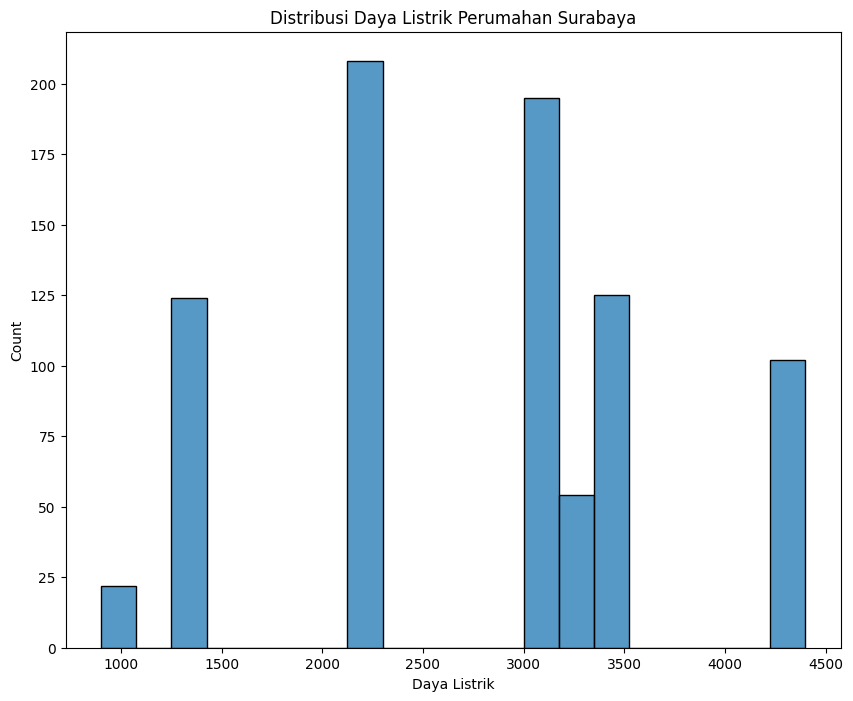

In [438]:
plt.figure(figsize=(10, 8))
sns.histplot(data= daya_listrik, x='Daya Listrik', kde=False, bins=20)
plt.title('Distribusi Daya Listrik Perumahan Surabaya')
plt.show()